# solution 1

In [117]:
import numpy as np
from matplotlib import pyplot as plt

In [126]:
class rope():
  def __init__(self):
    self.head_pos = [0,0]
    self.tail_pos = [0,0]
    self.it = 0
    self.history_head= np.zeros((20000,2))
    self.history_tail= np.zeros((20000,2))
  
  def update_head_pos(self, d, n):
      self.it += 1
      if d == "R":
        self.head_pos[0] += 1
      if d == "L":
        self.head_pos[0] -= 1
      if d == "U":
        self.head_pos[1] += 1
      if d == "D":
        self.head_pos[1] -= 1
      r.update_tail_pos()
      self.history_head[self.it, :] = self.head_pos
      self.history_tail[self.it,:] = self.tail_pos
      #print(self.head_pos, self.tail_pos)
      
  def update_tail_pos(self):
    dx = self.head_pos[0] - self.tail_pos[0]
    dy = self.head_pos[1] - self.tail_pos[1]
    #print(dx, dy)
    if dx!=0 and dy!=0 and ((abs(dx) > 1) or (abs(dy)>1)):
      self.tail_pos[0] = self.tail_pos[0] + np.sign(dx)*1
      self.tail_pos[1] = self.tail_pos[1] + np.sign(dy)*1
    #  ??
    elif dx > 1:
      self.tail_pos[0] += 1
    elif dx < -1:
      self.tail_pos[0] -= 1
    elif dy > 1:
      self.tail_pos[1] += 1
    elif dy < -1:
      self.tail_pos[1] -= 1

In [127]:
r = rope()
with open("9th.txt", "r") as file:
    for i, line in enumerate(file):
      instruction = line.strip().split(" ")
      r.update_head_pos(instruction[0], int(instruction[1]))

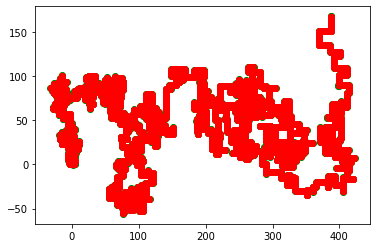

In [129]:
fig, ax = plt.subplots()
ax.plot(r.history_head[:r.it, 0], r.history_head[:r.it,1], color="green")
ax.scatter(r.history_head[:r.it, 0], r.history_head[:r.it,1], color="green")
ax.plot(r.history_tail[:r.it, 0], r.history_tail[:r.it, 1], color="red", lw=3)
ax.scatter(r.history_tail[:r.it, 0], r.history_tail[:r.it, 1], color="red")
#ax.set_xlim(0,6)
#ax.set_ylim(0,6)

In [130]:
poslist = [tuple(i) for i in list(r.history_tail)]
posset = set(poslist)
len(posset)

6367

# Part2

In [174]:
class rope():
  def __init__(self):
    self.head_pos = [0,0]
    self.tail_pos = [0,0]
    self.it = 0
    self.history_head= np.zeros((20000,2))
    self.history_tail= np.zeros((20000,2))
  
  def set_head_pos(self,new_pos, it):
    assert it == 1
    self.head_pos = new_pos
    self.update_tail_pos()
    self.it += it
    self.history_head[self.it, :] = self.head_pos
    self.history_tail[self.it,:] = self.tail_pos
  
  def update_head_pos(self, d, n):
      self.it += 1
      if d == "R":
        self.head_pos[0] += 1
      if d == "L":
        self.head_pos[0] -= 1
      if d == "U":
        self.head_pos[1] += 1
      if d == "D":
        self.head_pos[1] -= 1
      self.update_tail_pos()
      self.history_head[self.it, :] = self.head_pos
      self.history_tail[self.it,:] = self.tail_pos
      #print(self.head_pos, self.tail_pos)
      
  def update_tail_pos(self):
    dx = self.head_pos[0] - self.tail_pos[0]
    dy = self.head_pos[1] - self.tail_pos[1]
    #print(dx, dy)
    if dx!=0 and dy!=0 and ((abs(dx) > 1) or (abs(dy)>1)):
      self.tail_pos[0] = self.tail_pos[0] + np.sign(dx)*1
      self.tail_pos[1] = self.tail_pos[1] + np.sign(dy)*1
    #  ??
    elif dx > 1:
      self.tail_pos[0] += 1
    elif dx < -1:
      self.tail_pos[0] -= 1
    elif dy > 1:
      self.tail_pos[1] += 1
    elif dy < -1:
      self.tail_pos[1] -= 1

In [181]:
class mega_rope():
  def __init__(self):
    self.n_endings = 9
    self.subropes = {}
    for i in range(self.n_endings):
      self.subropes[i] = rope()
  
  def update_all(self, d, n):
    for i in range(n):
      self.subropes[0].update_head_pos(d, 1)
      next_head = self.subropes[0].tail_pos
      #print(next_head)
      for sr in range(1, self.n_endings):
        self.subropes[sr].set_head_pos(next_head, 1)
        next_head = self.subropes[sr].tail_pos
      

In [182]:
mr = mega_rope()
mr.update_all("R", 3)

In [183]:
[mr.subropes[a].tail_pos for a in mr.subropes]

[[2, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]

In [184]:
[mr.subropes[a].head_pos for a in mr.subropes]

[[3, 0], [2, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]

In [194]:
mr = mega_rope()
with open("9th.txt", "r") as file:
    for i, line in enumerate(file):
      instruction = line.strip().split(" ")
      mr.update_all(instruction[0], int(instruction[1]))

In [195]:
#mr.subropes[8].history_tail[:20,:]

In [196]:
poslist = [tuple(i) for i in list(mr.subropes[8].history_tail)]
posset = set(poslist)
len(posset)

2536